<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Aprendizado de máquina: Projeto de **Parceria**
<br>
Aluno [Rafael Maia](https://www.linkedin.com/in/luis-rafael-fernandes-maia-357981a7/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução Projeto Parceria;</li>
  <li>Coleta dos Dados;</li>
  <li>Análise Exploratoria.</li>
  <li>Manipulação;</li>
  <li>Machine Learning;</li>
  <li>Visualização;</li>
  <li>Storytelling.</li>
</ol>


---

# **1. Introdução Projeto Parceria**

A Importância dos Dados na Previsão de Vendas

A previsão de vendas é um dos pilares da gestão empresarial, permitindo que as empresas planejem a compra e estocagem dos produtos mais vendidos, a distribuição e as estratégias de marketing de forma mais eficiente. E os dados são o combustível que impulsiona essa previsão.

Ao coletar e analisar uma quantidade de dados, como histórico de vendas, dados demográficos e geográficos, tendências de mercado, informações sobre a concorrência e dados de campanhas de marketing, as empresas podem identificar padrões e tendências que, de outra forma, passariam despercebidas.

Análise de dados permite:

*   Identificar oportunidades de crescimento: Ao identificar produtos ou regiões com alto potencial de vendas, as empresas podem direcionar seus esforços para aumentar as receitas.

*   Minimizar riscos: Ao prever possíveis quedas nas vendas, as empresas podem tomar medidas para ajustar seus estoques e evitar perdas financeiras.

*   Otimizar a gestão de estoque: Ao prever a demanda com maior precisão, as empresas podem evitar a falta de produtos e a ociosidade de capital.

*   Personalizar a experiência do cliente: Ao analisar os dados dos clientes, as empresas podem oferecer produtos e serviços mais relevantes, aumentando a satisfação e a fidelização.

Em resumo, os dados são a chave para uma previsão de vendas mais precisa e confiável. Ao utilizar análise de dados, as empresas podem tomar decisões mais estratégicas e aumentar sua competitividade no mercado.

---

## 1\.1 Análise Exploratória de Dados Big Mart Sales Prediction

Escolhi os dados Big Mart Sales Prediction do Kaggle, sendo uma fonte pública como pedido no Briefing e tendo as características que se adequam a proposta do projeto. Pois se trata de dados de previsão de vendas,  que é a base de praticamente quase todas as empresas. A previsão de vendas é um elemento crucial para o sucesso de qualquer negócio, especialmente em grandes redes de varejo. A capacidade de antecipar a demanda por produtos em diferentes lojas e períodos permite otimizar a gestão de estoque, planejar promoções, alocar recursos de forma eficiente e, consequentemente, aumentar a lucratividade.
Neste estudo, exploraremos a aplicação de técnicas de aprendizado de máquina para construir um modelo preditivo capaz de estimar as vendas de produtos em diferentes lojas, com base em um conjunto de dados e atributos relevantes.

# **2. Coleta dos Dados**
## 2\. Pacotes e bibliotecas

In [1]:
# importe todas as suas bibliotecas aqui, siga os padrões do PEP8:
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing


## 2\.1 Coleta de dados e ajustes para visualização

In [2]:
# Coleta de Dados
# - coleta de dados;

! pip install kaggle -q

from google.colab import files
files.upload()

! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# Baixar o dataset
%cd /content/

! kaggle datasets download -d 'shivan118/big-mart-sales-prediction-datasets'

! unzip big-mart-sales-prediction-datasets.zip -d BigMart

# - Visualizar em Data Frame;

with open('/content/BigMart/train.csv', mode='r', encoding='utf8') as file:
  data = pd.read_csv(file)

sales_df = pd.DataFrame(data)

# primeiros ajustes nos dados

colunas_para_remover = ["Item_Fat_Content", "Item_Type", "Outlet_Establishment_Year", "Outlet_Type"]
sales_df = sales_df.drop(columns=colunas_para_remover)

mean_value= sales_df.loc[:, 'Item_Weight'].mean()
sales_df.fillna({"Item_Weight":mean_value}, inplace=True)

sales_df.fillna({"Outlet_Size":"Medium"}, inplace=True)

sales_df['Item_Outlet_Sales'] = sales_df['Item_Outlet_Sales'].round(1)

sales_df.head()


Saving kaggle.json to kaggle.json
/content
Dataset URL: https://www.kaggle.com/datasets/shivan118/big-mart-sales-prediction-datasets
License(s): CC0-1.0
  0% 0.00/327k [00:00<?, ?B/s]
100% 327k/327k [00:00<00:00, 78.0MB/s]
Archive:  big-mart-sales-prediction-datasets.zip
  inflating: BigMart/sample_submission.csv  
  inflating: BigMart/test.csv        
  inflating: BigMart/train.csv       


,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,FDA15,9.30,0.016047,249.8092,OUT049,Medium,Tier 1,3735.1
1,DRC01,5.92,0.019278,48.2692,OUT018,Medium,Tier 3,443.4
2,FDN15,17.50,0.016760,141.6180,OUT049,Medium,Tier 1,2097.3
3,FDX07,19.20,0.000000,182.0950,OUT010,Medium,Tier 3,732.4
4,NCD19,8.93,0.000000,53.8614,OUT013,High,Tier 3,994.7


#3. Analise exploratoria
##3.1 - Vendas por Loja

Escolhi analisar a vendas por Loja, pois entendo que é crucial entender o desempenho individual de cada unidade. Esse ponto é relevante por várias razões:

Identificação de Tendências ao analisar as vendas por loja, é possível identificar quais lojas estão performando acima ou abaixo da média. Isso ajuda a detectar tendências de consumo específicas de cada região ou localidade.
Compreender quais lojas têm maior volume de vendas permite uma melhor alocação de recursos, como estoque, pessoal e campanhas de marketing. Lojas com vendas mais altas podem necessitar de mais produtos e funcionários para atender à demanda.
Lojas com desempenho inferior podem ser alvo de estratégias específicas de melhoria, como treinamentos adicionais para a equipe, mudanças no layout da loja ou promoções direcionadas.

In [3]:
total_sales_by_store = sales_df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().reset_index()

# Renomear a coluna para algo mais descritivo
total_sales_by_store.columns = ['Outlet_Identifier', 'Total_Sales']

print(total_sales_by_store)

  Outlet_Identifier  Total_Sales
0            OUT010     188339.7
1            OUT013    2142662.9
2            OUT017    2167465.6
3            OUT018    1851822.8
4            OUT019     179693.9
5            OUT027    3453925.4
6            OUT035    2268123.2
7            OUT045    2036725.2
8            OUT046    2118396.4
9            OUT049    2183969.4


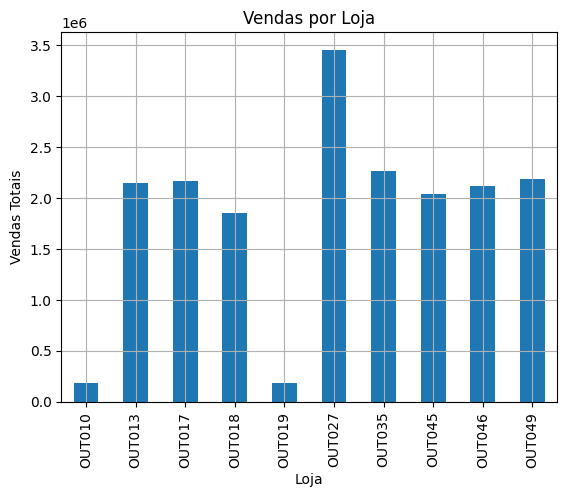

In [4]:
sales_by_outlet = sales_df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()

# Criar o gráfico de barras
sales_by_outlet.plot(kind='bar')
plt.title('Vendas por Loja')
plt.xlabel('Loja')
plt.ylabel('Vendas Totais')
plt.grid(True)
plt.show()

O outlet identificado como OUT027 tem uma contagem de vendas significativamente maior do que os outros, indicando um desempenho superior em vendas.
Comparação entre Outlets: Outros outlets como OUT019 e OUT010 têm contagens de vendas menores, sugerindo que há uma grande disparidade nas vendas entre os diferentes outlets.
Distribuição de Vendas: A maioria dos outlets tem contagens de vendas relativamente baixas, com apenas alguns se destacando. Isso pode indicar a necessidade de investigar o que está funcionando bem no OUT027 e aplicar essas estratégias aos outros outlets.
Esses observações podem ajudar a identificar áreas de melhoria e oportunidades para aumentar as vendas nos outlets com desempenho inferior.

##3.2 - Vendas por Tamanho da Loja

O tamanho da loja é outro ponto fundamental a ser avaliado, pois influencia diretamente na capacidade de atendimento e na experiência do cliente. A relevância desse ponto se justifica:

Lojas maiores geralmente têm uma capacidade maior de atendimento, podendo acomodar mais clientes simultaneamente e oferecer uma variedade maior de produtos. Isso pode resultar em um aumento nas vendas e na satisfação do cliente.
O tamanho da loja pode impactar a experiência de compra. Lojas mais espaçosas tendem a proporcionar uma experiência mais confortável e agradável, o que pode influenciar positivamente a percepção do cliente e, consequentemente, as vendas.
Avaliar o tamanho da loja também é importante para entender os custos operacionais. Lojas maiores podem ter custos mais elevados de aluguel, manutenção e pessoal, o que deve ser balanceado com o volume de vendas gerado.

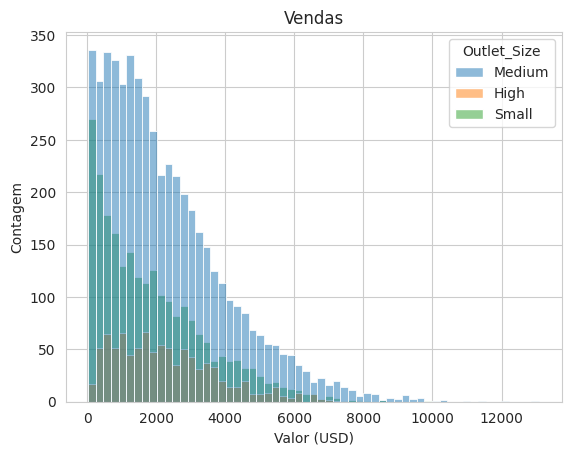

In [5]:
with sns.axes_style('whitegrid'):

  grafico = sns.histplot(data=sales_df, x="Item_Outlet_Sales", hue="Outlet_Size" )
  grafico.set(title='Vendas', xlabel='Valor (USD)', ylabel='Contagem');

Tamanho dos Outlets: Os outlets de tamanho médio (barras azuis) parecem ter uma contagem de vendas mais alta em comparação com os outlets pequenos (barras verdes) e grandes (barras laranjas). Isso pode sugerir que os outlets de tamanho médio são mais eficazes em gerar vendas.
Estratégias de Preço: A concentração de vendas em valores mais baixos pode indicar que os produtos de menor preço são mais populares. Isso pode ser útil para ajustar estratégias de preço e promoção.

## 4\. Manipulação

In [6]:
# faça o código de manipulação de dados:
# variaveis numericas
media_i_w = sales_df['Item_Weight'].mean()
desvio_padrao_i_w = sales_df['Item_Weight'].std()
sales_df['Item_Weight_std'] = (sales_df['Item_Weight'] - media_i_w) / desvio_padrao_i_w

media_i_v = sales_df['Item_Visibility'].mean()
desvio_padrao_i_v = sales_df['Item_Visibility'].std()
sales_df['Item_Visibility_std'] = (sales_df['Item_Visibility'] - media_i_v) / desvio_padrao_i_v

media_mrp = sales_df['Item_MRP'].mean()
desvio_padrao_mrp = sales_df['Item_MRP'].std()
sales_df['Item_MRP_std'] = (sales_df['Item_MRP'] - media_mrp) / desvio_padrao_mrp

# variaveis categoricas

sales_df['Item_Identifier_Freq'] = sales_df['Item_Identifier'].map(sales_df['Item_Identifier'].value_counts())
sales_df['High_nom'] = sales_df['Outlet_Size'].apply(lambda Outlet_Size: 1 if Outlet_Size == 'High' else 0)
sales_df['Medium_nom'] = sales_df['Outlet_Size'].apply(lambda Outlet_Size: 1 if Outlet_Size == 'Medium' else 0)
sales_df['Small_nom'] = sales_df['Outlet_Size'].apply(lambda Outlet_Size: 1 if Outlet_Size == 'Small' else 0)
sales_df['Tier 1_nom'] = sales_df['Outlet_Location_Type'].apply(lambda Outlet_Location_Type: 1 if Outlet_Location_Type == 'Tier 1' else 0)
sales_df['Tier 2_nom'] = sales_df['Outlet_Location_Type'].apply(lambda Outlet_Location_Type: 1 if Outlet_Location_Type == 'Tier 2' else 0)
sales_df['Tier 3_nom'] = sales_df['Outlet_Location_Type'].apply(lambda Outlet_Location_Type: 1 if Outlet_Location_Type == 'Tier 3' else 0)
sales_df['OUT027_nom'] = sales_df['Outlet_Identifier'].apply(lambda Outlet_Identifier: 1 if Outlet_Identifier == 'OUT027' else 0)
sales_df['OUT013_nom'] = sales_df['Outlet_Identifier'].apply(lambda Outlet_Identifier: 1 if Outlet_Identifier == 'OUT013' else 0)
sales_df['OUT049_nom'] = sales_df['Outlet_Identifier'].apply(lambda Outlet_Identifier: 1 if Outlet_Identifier == 'OUT049' else 0)
sales_df['OUT046_nom'] = sales_df['Outlet_Identifier'].apply(lambda Outlet_Identifier: 1 if Outlet_Identifier == 'OUT046' else 0)
sales_df['OUT035_nom'] = sales_df['Outlet_Identifier'].apply(lambda Outlet_Identifier: 1 if Outlet_Identifier == 'OUT035' else 0)
sales_df['OUT045_nom'] = sales_df['Outlet_Identifier'].apply(lambda Outlet_Identifier: 1 if Outlet_Identifier == 'OUT045' else 0)
sales_df['OUT018_nom'] = sales_df['Outlet_Identifier'].apply(lambda Outlet_Identifier: 1 if Outlet_Identifier == 'OUT018' else 0)
sales_df['OUT017_nom'] = sales_df['Outlet_Identifier'].apply(lambda Outlet_Identifier: 1 if Outlet_Identifier == 'OUT017' else 0)
sales_df['OUT010_nom'] = sales_df['Outlet_Identifier'].apply(lambda Outlet_Identifier: 1 if Outlet_Identifier == 'OUT010' else 0)
sales_df['OUT019_nom'] = sales_df['Outlet_Identifier'].apply(lambda Outlet_Identifier: 1 if Outlet_Identifier == 'OUT019' else 0)

# - Limpeza dos dados;
colunas_para_remover = ["Item_Identifier", "Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type"]
sales_df = sales_df.drop(columns=colunas_para_remover)

# - controle de qualidade;

sales_df.info()
sales_df.isna().any()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Outlet_Sales     8523 non-null   float64
 1   Item_Weight_std       8523 non-null   float64
 2   Item_Visibility_std   8523 non-null   float64
 3   Item_MRP_std          8523 non-null   float64
 4   Item_Identifier_Freq  8523 non-null   int64  
 5   High_nom              8523 non-null   int64  
 6   Medium_nom            8523 non-null   int64  
 7   Small_nom             8523 non-null   int64  
 8   Tier 1_nom            8523 non-null   int64  
 9   Tier 2_nom            8523 non-null   int64  
 10  Tier 3_nom            8523 non-null   int64  
 11  OUT027_nom            8523 non-null   int64  
 12  OUT013_nom            8523 non-null   int64  
 13  OUT049_nom            8523 non-null   int64  
 14  OUT046_nom            8523 non-null   int64  
 15  OUT035_nom           

,0
Item_Outlet_Sales,False
Item_Weight_std,False
Item_Visibility_std,False
Item_MRP_std,False
Item_Identifier_Freq,False
High_nom,False
Medium_nom,False
Small_nom,False
Tier 1_nom,False
Tier 2_nom,False


## 5\. Machine Learning

Treino e Teste do Modelo

In [7]:

# - Separando os dados entre treino e teste;

predictors_train, predictors_test, target_train, target_test = train_test_split(
    sales_df.drop(['Item_Outlet_Sales'], axis=1),
    sales_df['Item_Outlet_Sales'],
    test_size=0.33,
    random_state=123
)

# - Treino do modelo

model = LinearRegression()
model = model.fit(predictors_train, target_train)
model.__dict__


# - Avaliação do modelo
target_predicted = model.predict(predictors_test)

rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

1151.6919103931457


## 5.1\. Predição



### Vendas Futuras

In [8]:
# importar os dados de previsão
with open('/content/BigMart/test.csv', mode='r', encoding='utf8') as file:
  data = pd.read_csv(file)

data_test = pd.DataFrame(data)

#  ajustes nos dados

colunas_para_remover = ["Item_Fat_Content", "Item_Type", "Outlet_Establishment_Year", "Outlet_Type"]
data_test = data_test.drop(columns=colunas_para_remover)

mean_value= data_test.loc[:, 'Item_Weight'].mean()
data_test.fillna({"Item_Weight":mean_value}, inplace=True)

data_test.fillna({"Outlet_Size":"Medium"}, inplace=True)

sales_future = data_test.copy()

# variaveis numericas
media_i_w = sales_future['Item_Weight'].mean()
desvio_padrao_i_w = sales_future['Item_Weight'].std()
sales_future['Item_Weight_std'] = (sales_future['Item_Weight'] - media_i_w) / desvio_padrao_i_w

media_i_v = sales_future['Item_Visibility'].mean()
desvio_padrao_i_v = sales_future['Item_Visibility'].std()
sales_future['Item_Visibility_std'] = (sales_future['Item_Visibility'] - media_i_v) / desvio_padrao_i_v

media_mrp = sales_future['Item_MRP'].mean()
desvio_padrao_mrp = sales_future['Item_MRP'].std()
sales_future['Item_MRP_std'] = (sales_future['Item_MRP'] - media_mrp) / desvio_padrao_mrp

# variaveis categoricas

sales_future['Item_Identifier_Freq'] = sales_future['Item_Identifier'].map(sales_future['Item_Identifier'].value_counts())
sales_future['High_nom'] = sales_future['Outlet_Size'].apply(lambda Outlet_Size: 1 if Outlet_Size == 'High' else 0)
sales_future['Medium_nom'] = sales_future['Outlet_Size'].apply(lambda Outlet_Size: 1 if Outlet_Size == 'Medium' else 0)
sales_future['Small_nom'] = sales_future['Outlet_Size'].apply(lambda Outlet_Size: 1 if Outlet_Size == 'Small' else 0)
sales_future['Tier 1_nom'] = sales_future['Outlet_Location_Type'].apply(lambda Outlet_Location_Type: 1 if Outlet_Location_Type == 'Tier 1' else 0)
sales_future['Tier 2_nom'] = sales_future['Outlet_Location_Type'].apply(lambda Outlet_Location_Type: 1 if Outlet_Location_Type == 'Tier 2' else 0)
sales_future['Tier 3_nom'] = sales_future['Outlet_Location_Type'].apply(lambda Outlet_Location_Type: 1 if Outlet_Location_Type == 'Tier 3' else 0)
sales_future['OUT027_nom'] = sales_future['Outlet_Identifier'].apply(lambda Outlet_Identifier: 1 if Outlet_Identifier == 'OUT027' else 0)
sales_future['OUT013_nom'] = sales_future['Outlet_Identifier'].apply(lambda Outlet_Identifier: 1 if Outlet_Identifier == 'OUT013' else 0)
sales_future['OUT049_nom'] = sales_future['Outlet_Identifier'].apply(lambda Outlet_Identifier: 1 if Outlet_Identifier == 'OUT049' else 0)
sales_future['OUT046_nom'] = sales_future['Outlet_Identifier'].apply(lambda Outlet_Identifier: 1 if Outlet_Identifier == 'OUT046' else 0)
sales_future['OUT035_nom'] = sales_future['Outlet_Identifier'].apply(lambda Outlet_Identifier: 1 if Outlet_Identifier == 'OUT035' else 0)
sales_future['OUT045_nom'] = sales_future['Outlet_Identifier'].apply(lambda Outlet_Identifier: 1 if Outlet_Identifier == 'OUT045' else 0)
sales_future['OUT018_nom'] = sales_future['Outlet_Identifier'].apply(lambda Outlet_Identifier: 1 if Outlet_Identifier == 'OUT018' else 0)
sales_future['OUT017_nom'] = sales_future['Outlet_Identifier'].apply(lambda Outlet_Identifier: 1 if Outlet_Identifier == 'OUT017' else 0)
sales_future['OUT010_nom'] = sales_future['Outlet_Identifier'].apply(lambda Outlet_Identifier: 1 if Outlet_Identifier == 'OUT010' else 0)
sales_future['OUT019_nom'] = sales_future['Outlet_Identifier'].apply(lambda Outlet_Identifier: 1 if Outlet_Identifier == 'OUT019' else 0)

# - Limpeza dos dados;
colunas_para_remover = ["Item_Identifier", "Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type"]
sales_future = sales_future.drop(columns=colunas_para_remover)


# - controle de qualidade;

sales_future.info()
sales_future.isna().any()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight_std       5681 non-null   float64
 1   Item_Visibility_std   5681 non-null   float64
 2   Item_MRP_std          5681 non-null   float64
 3   Item_Identifier_Freq  5681 non-null   int64  
 4   High_nom              5681 non-null   int64  
 5   Medium_nom            5681 non-null   int64  
 6   Small_nom             5681 non-null   int64  
 7   Tier 1_nom            5681 non-null   int64  
 8   Tier 2_nom            5681 non-null   int64  
 9   Tier 3_nom            5681 non-null   int64  
 10  OUT027_nom            5681 non-null   int64  
 11  OUT013_nom            5681 non-null   int64  
 12  OUT049_nom            5681 non-null   int64  
 13  OUT046_nom            5681 non-null   int64  
 14  OUT035_nom            5681 non-null   int64  
 15  OUT045_nom           

,0
Item_Weight_std,False
Item_Visibility_std,False
Item_MRP_std,False
Item_Identifier_Freq,False
High_nom,False
Medium_nom,False
Small_nom,False
Tier 1_nom,False
Tier 2_nom,False
Tier 3_nom,False


In [9]:
# executando uma predição com dados novos
sales_predict = model.predict(sales_future)
df_sales_predict = pd.DataFrame(sales_predict, columns=['Item_Outlet_Sales'])

# Combinando os dados
sales_projection = pd.merge(data_test, df_sales_predict, left_index=True, right_index=True)

# Exibindo o DataFrame combinado
sales_projection.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,FDW58,20.750000,0.007565,107.8622,OUT049,Medium,Tier 1,1799.980515
1,FDW14,8.300000,0.038428,87.3198,OUT017,Medium,Tier 2,1554.847763
2,NCN55,14.600000,0.099575,241.7538,OUT010,Medium,Tier 3,1880.958363
3,FDQ58,7.315000,0.015388,155.0340,OUT017,Medium,Tier 2,2611.961092
4,FDY38,12.695633,0.118599,234.2300,OUT027,Medium,Tier 3,5059.300808


In [11]:
sales_projection['Item_Outlet_Sales'] = sales_projection['Item_Outlet_Sales'].round(1)

total_sales_by_store = sales_projection.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().reset_index()

# Renomear a coluna para algo mais descritivo
total_sales_by_store.columns = ['Outlet_Identifier', 'Total_Sales']

print(total_sales_by_store)

  Outlet_Identifier  Total_Sales
0            OUT010     126412.9
1            OUT013    1426307.4
2            OUT017    1479890.7
3            OUT018    1192755.7
4            OUT019     139702.7
5            OUT027    2296273.5
6            OUT035    1470764.5
7            OUT045    1364179.8
8            OUT046    1398340.9
9            OUT049    1439442.0


Imagem dos Totais de vendas por loja, retirados dos dados de treino, comparando com os dados de predição, podemos observar que os valores são bem proximos.

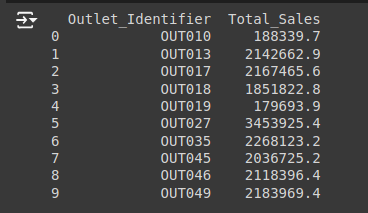

## 6\. Visualização

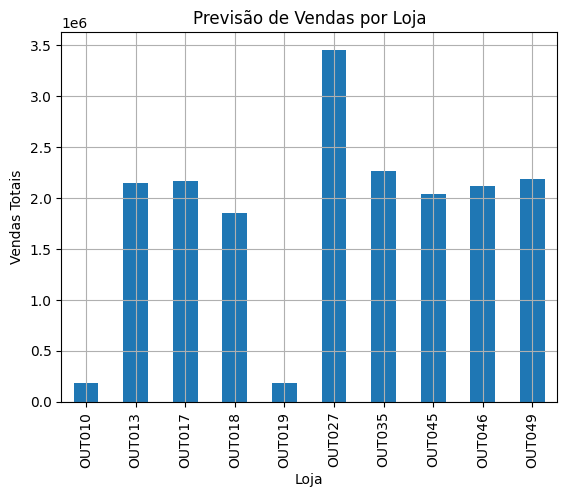

In [13]:
sales_by_outlet_projection = sales_projection.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()

# Criar o gráfico de barras
sales_by_outlet.plot(kind='bar')
plt.title('Previsão de Vendas por Loja')
plt.xlabel('Loja')
plt.ylabel('Vendas Totais')
plt.grid(True)
plt.show()

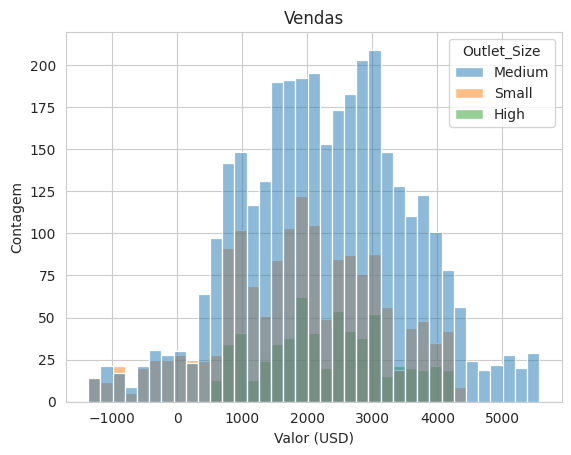

In [14]:
with sns.axes_style('whitegrid'):

  grafico = sns.histplot(data=sales_projection, x="Item_Outlet_Sales", hue="Outlet_Size" )
  grafico.set(title='Vendas', xlabel='Valor (USD)', ylabel='Contagem');

# 7. Insights encontrados
##Gráfico 1##

Comparandos o gráfico da analise dos dados de treino com o gráfico da predição podemos observar que as vendas das lojas serão mantidas no mesmo patamar, nos indicando devemos tomar ações necessarias para melhorar as vendas nas filiais onde os numeros são mais baixos, de forma a alavancar as vendas e melhorar o faturamento geral

##Gráfico 2##

Os outlets de tamanho médio se mantém na frente igual aos dados de treino. Distribuição de Vendas foi que mudou agora estando concentrada em torno de valores positivos, especialmente entre 0.5 e 1.5 milhões de USD. Isso indica que a maioria dos outlets irão gerar vendas significativas.
Nos dados de treino a concentração de vendas em valores mais baixos indicava que os produtos de menor preço são mais populares. Agora os dados de predição mostra um aumento consideravel no ticket medio.
nos dados de predição existe faixas de valor negativas, o que pode indicar futuras devoluções ou ajustes de vendas, desta forma podemos tomar ações em cima dos possiveis produtos problematicos, e evitar prejuizos.
